# NLP

## POS Marcation and Stemming

In [ ]:
import bs4 as bs
import urllib.request as request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=322a3e8757b7387a1f1f6a279c0886ea4d37a8fa19617d03ee2f5f49691999a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-cjhejkni/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
pln = spacy.load("pt")

In [ ]:
document = pln("Estou aprendendo processamento de linguagem natural no Brasil")

In [ ]:
for token in document:
  print(token.text + " - " + token.pos_)

Estou - AUX
aprendendo - VERB
processamento - NOUN
de - ADP
linguagem - NOUN
natural - ADJ
no - PROPN
Brasil - PROPN


In [ ]:
for token in document:
  print(token.text + " - " + token.lemma_)

Estou - Estou
aprendendo - aprender
processamento - processamento
de - de
linguagem - linguagem
natural - natural
no - o
Brasil - Brasil


In [ ]:
nltk.download("rslp")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("aprendendo")

'aprend'

In [ ]:
for token in document:
  print(token.text + " - " + 
        token.lemma_ + " - "  + 
        stemmer.stem(token.text))

Estou - Estou - est
aprendendo - aprender - aprend
processamento - processamento - process
de - de - de
linguagem - linguagem - lingu
natural - natural - natur
no - o - no
Brasil - Brasil - brasil


## Load data base

In [ ]:
data = request.urlopen("https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial")

In [ ]:
data = data.read()
data_html = bs.BeautifulSoup(data, "lxml")
paragraphs = data_html.find_all("p")

In [ ]:
content = ""
for p in paragraphs:
  content += p.text

content = content.lower()
content = content.replace("\n", "").replace("\t", "")

In [ ]:
content

'páginas para editores conectados saiba maisinteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia de produ

## Find Text - Spacy

In [ ]:
pln = spacy.load("pt")

In [ ]:
string = "turing"
token_search = pln(string)

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add("SEARCH", None, token_search)

In [ ]:
doc = pln(content)
matches = matcher(doc)
matches

[(8661325627334373315, 2939, 2940),
 (8661325627334373315, 2949, 2950),
 (8661325627334373315, 3102, 3103),
 (8661325627334373315, 3107, 3108),
 (8661325627334373315, 3113, 3114),
 (8661325627334373315, 3173, 3174),
 (8661325627334373315, 3787, 3788),
 (8661325627334373315, 5041, 5042),
 (8661325627334373315, 8377, 8378),
 (8661325627334373315, 8510, 8511),
 (8661325627334373315, 8603, 8604),
 (8661325627334373315, 8717, 8718)]

In [ ]:
doc[2939:2940], doc[2939 - 5:2940 + 5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [ ]:
from IPython.core.display import HTML

text = ''
num_words = 50
doc = pln(content)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Found Results:</strong> {len(matches)}</p>"""))

for m in matches:
  start = m[1] - num_words
  if start < 0:
    start = 0
  text += str(doc[start:m[2] + num_words]).replace(string, f"<mark>{string}</mark>")
  text += "<br /><br />"
  
display(HTML(f"""... {text} ... """))

## Entity Extraction

In [ ]:
for entity in doc.ents:
  print(entity.text + " - " + entity.label_)

In [ ]:
from spacy import displacy
displacy.render(doc, style = "ent", jupyter = True)

## Word Cloud

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'tanto', 'dá', 'dezanove', 'teus', 'ainda', 'tuas', 'tiveram', 'não', 'este', 'tivestes', 'sempre', 'novo', 'grande', 'mês', 'puderam', 'apoio', 'oitava', 'nossas', 'poder', 'neste', 'fará', 'sei', 'poderá', 'quarto', 'aqueles', 'às', 'ademais', 'cima', 'primeiro', 'tentaram', 'vocês', 'oitavo', 'sob', 'comprido', 'três', 'ali', 'certamente', 'fomos', 'sete', 'enquanto', 'conselho', 'vêm', 'de', 'no', 'ambos', 'lá', 'inicio', 'lado', 'dizer', 'meus', 'menor', 'nuns', 'meio', 'relação', 'antes', 'pois', 'tempo', 'dizem', 'elas', 'tua', 'esse', 'vem', 'tendes', 'desde', 'quinze', 'outras', 'bem', 'toda', 'mesmo', 'foste', 'querem', 'estou', 'outros', 'zero', 'porquanto', 'for', 'isso', 'tarde', 'entre', 'sexta', 'área', 'vão', 'sexto', 'menos', 'tipo', 'mal', 'também', 'des', 'vais', 'põe', 'tivemos', 'mil', 'iniciar', 'favor', 'fazem', 'próprio', 'à', 'da', 'somente', 'ser', 'comprida', 'nesta', 'estará', 'saber', 'eu', 'sétima', 'posição', 'máximo', 'cá', 'nada', 'pontos', 'quieta', '

In [ ]:
len(STOP_WORDS)

413

In [ ]:
pln.vocab['usa'].is_stop

True

In [ ]:
doc = pln(content)
token_list = []
for token in doc:
  token_list.append(token.text)
token_list

In [ ]:
len(token_list)

9631

In [ ]:
no_stop = []
for word in token_list:
  if pln.vocab[word].is_stop == False:
    no_stop.append(word)
no_stop

In [ ]:
len(no_stop)

6343

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

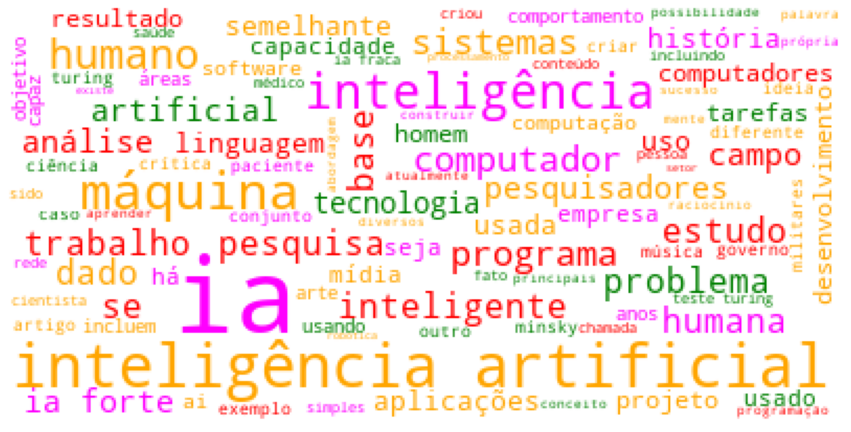

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(no_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()